# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.  

In [19]:
import pandas as pd
df = pd.read_csv('asseAB_US_2023.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'AB_US_2023.csv'

Fresher Skills


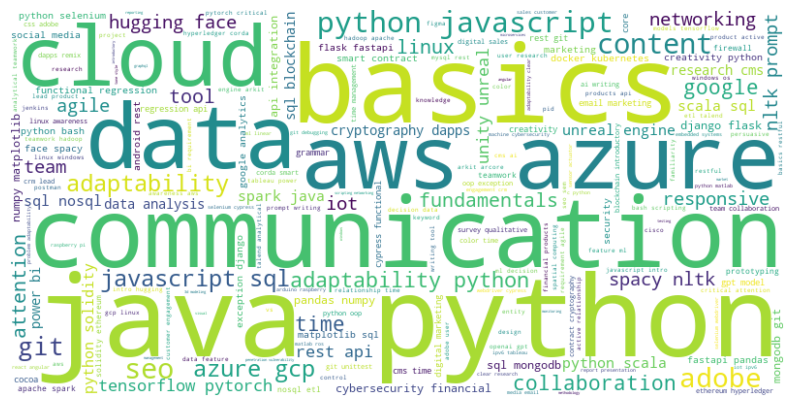

Experienced Skills


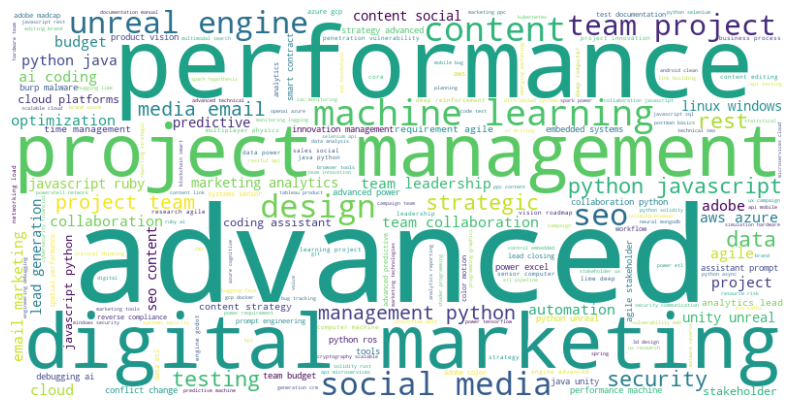

In [16]:
# %pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

# Define additional stopwords to remove
additional_stopwords = {'developer', 'framework', 'application', 'basic'}

# Separate "Fresher" and "Experienced" job rows
fresher_jobs = df[df['ExperienceLevel'].astype(str).str.contains('Fresher', case=False, na=False)]
experienced_jobs = df[~df['ExperienceLevel'].astype(str).str.contains('Fresher', case=False, na=False)]

# Concatenate text we want to analyze (use the Skills column here)
fresher_text = ' '.join(fresher_jobs['Skills'].astype(str))
experienced_text = ' '.join(experienced_jobs['Skills'].astype(str))

# Tokenize the words
fresher_words = fresher_text.lower().split()
experienced_words = experienced_text.lower().split()

# Remove punctuation and stopwords (including additional stopwords)
fresher_words = [
    w.strip(string.punctuation)
    for w in fresher_words
    if w.isalnum() and w not in sklearn_stop_words and w not in additional_stopwords
]

experienced_words = [
    w.strip(string.punctuation)
    for w in experienced_words
    if w.isalnum() and w not in sklearn_stop_words and w not in additional_stopwords
]

# Generate the word cloud - Fresher
print('Fresher Skills')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(fresher_words))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Generate the word cloud - Experienced
print('Experienced Skills')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(experienced_words))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



Figure 1 shows a word cloud of the most common skills mentioned in fresher job postings, and Figure 2 presents the same for experienced positions. The largest words, such as “Java,” “Python,” and “Communication,” indicate that these skills are most in demand among entry-level candidates. Meanwhile, words like “Advanced,” “Performance,” and “Digital Marketing” suggest that these skills are particularly sought after in experienced-level roles.

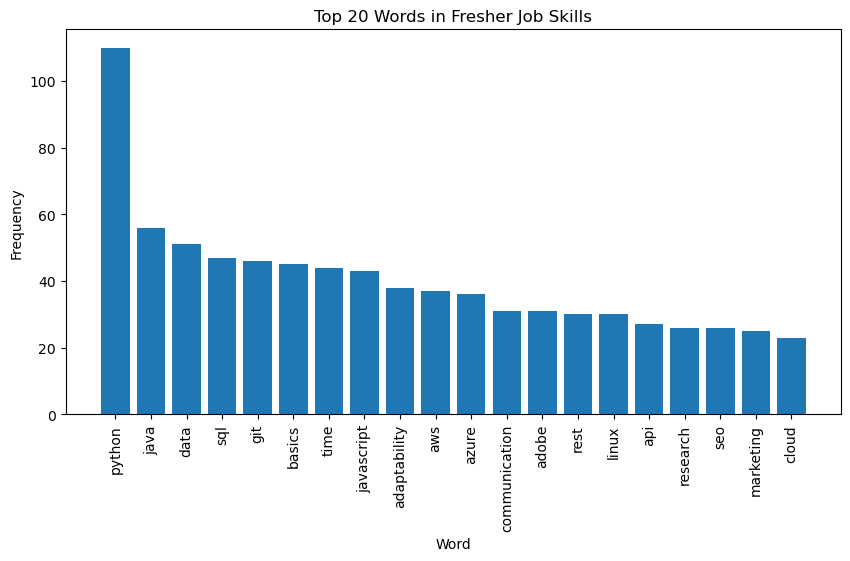

In [17]:
# Count the most common words in fresher job skills
fresher_word_freq = Counter(fresher_words)
fresher_common_words = fresher_word_freq.most_common(20)

# Convert to DataFrame for plotting
fresher_freq_df = pd.DataFrame(fresher_common_words, columns=['Word', 'Frequency'])

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(fresher_freq_df['Word'], fresher_freq_df['Frequency'])
ax.set_title(f'Top 20 Words in Fresher Job Skills')
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


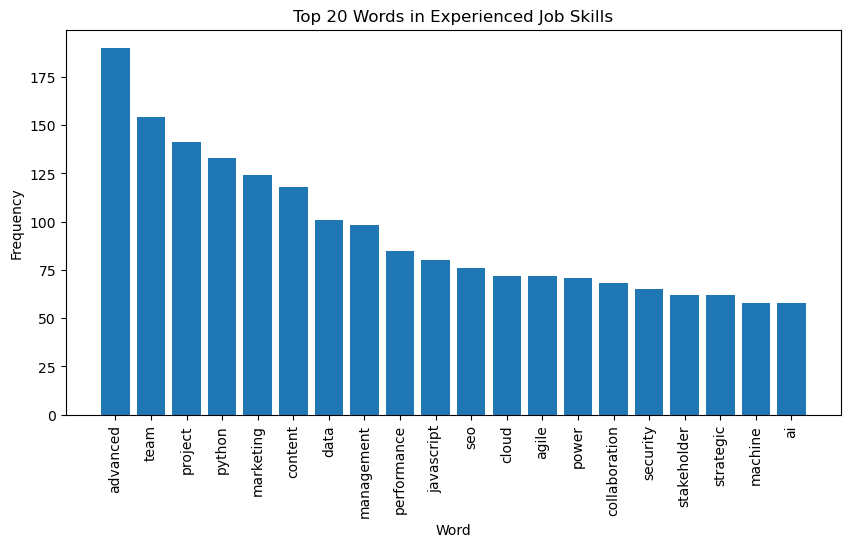

In [18]:
# Count the most common words in experienced job skills
experienced_word_freq = Counter(experienced_words)
experienced_common_words = experienced_word_freq.most_common(20)

# Convert to DataFrame for plotting
experienced_freq_df = pd.DataFrame(experienced_common_words, columns=['Word', 'Frequency'])

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(experienced_freq_df['Word'], experienced_freq_df['Frequency'])
ax.set_title(f'Top 20 Words in Experienced Job Skills')
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Figures 3 and 4 show the top 20 most common skills in fresher and experienced job postings. In fresher roles, words like “Java,” “Python,” and “data” appear most often, showing that beginner jobs focus on basic programming and teamwork skills. In experienced roles, words like “Advanced,” “team,” and “project” appear more, showing that senior jobs require deeper technical knowledge and specialized abilities.